<h1><b>LendingClubCaseStudy</b></h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
warn.filterwarnings("ignore")

<h1><b>Reading the Dataset</b></h1>

In [2]:
df=pd.read_csv('loan.csv',low_memory=False)
#df

<h1><b>Cleaning the dataset</b></h1>

<h4>Checking the percentage of Nan values in dataset</h4>

In [3]:
percentage_null=round(df.isnull().sum() * 100 / len(df),2)
#percentage_null

<h4>Dropping the Columns having greater or equal to 75% Nan values</h4>

In [4]:
df=df.drop(percentage_null[percentage_null>=75.0].index,axis=1)
df.shape

(39717, 55)

<h4>
    Finding the columns having unique data</br>
    Sorted unique values based on the columns</br>
    Dropping the unnecessary columns as per the column's data uniqueness</br>  
</h4>

In [5]:
columns_with_unique_values=df.nunique().sort_values()
df_unique_values = columns_with_unique_values.to_frame().reset_index()
df_unique_values.rename(columns = {'index':'names',0:'uniquecount'},inplace = True)
df_unique_values=df_unique_values[df_unique_values.uniquecount==1]
df_unique_values
df=df.drop(columns=df_unique_values['names'][0:len(df_unique_values)],axis=1)
df.shape

(39717, 46)

<h4>Dropping the columns which are not required for the data analysis (Customer behaviour)</h4>

In [6]:
df=df.drop(columns=['delinq_2yrs','id','member_id','desc','title','zip_code','mths_since_last_delinq','pub_rec_bankruptcies','emp_title','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','url'],axis=1)
df.shape

(39717, 19)

<h4>Dropping the rows home_ownership is having NONE values</h4>

In [7]:
df=df[df.home_ownership!='NONE']

<h4>Dropping the rows home_ownership is having Other values</h4>

In [8]:
df=df[df.home_ownership!='OTHER']

<h4>Dropping the rows loan_status is having Current Value</h4>

In [9]:
df=df[df.loan_status!="Current"]

In [10]:
# Splitting the issue_d colum for month
# df['issue_month']=pd.DatetimeIndex(df.issue_d).month

<h4>Removing the % from int_rate column</h4>

In [11]:
df.int_rate=df.int_rate.str.strip("%").astype(float)

<h4>
    Removing the % from revol_util column </br>
    revol_util column is customer behaviour column can be removed if not required</br>
</h4>

In [12]:
df.revol_util=df.revol_util.str.strip("%").astype(float)

<h4>Converting the term column to integers ( eg: 36 months as 36)</h4>

In [13]:
df.term=df.term.str.strip("months").astype(int)

<h4>Formatting issue_d</h4>

In [14]:
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')

<h4>converting installment column to int</h4>

In [15]:
df.installment=df.installment.astype(int)

<h4>Approved ratio of loan amount (funded_amnt_inv/loan_amnt)*100</h4>

In [16]:
df['loan_amnt_approved_ratio']=round((df.funded_amnt_inv*100)/(df.loan_amnt),2)

<h4>Manipulating the subgrading to numeric values for better visualization</h4>

In [17]:
sub_grad_manipulation=df.sub_grade.apply(lambda x:x[-1])
df.sub_grade=pd.to_numeric(sub_grad_manipulation)

<h4>
    emp_length column modification to number of years ( eg: 6 years as 6)</br>
    Filling the empty cells of emp_length with 0</br>
    If emp lenght is less than 1 year round off to 0</br>  
    If emp lenght is greater than 10 years round off to 10</br>
</h4>

In [18]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()
df.emp_length=pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [19]:
#Converting final data after cleaning to csv file
df.to_csv('loan_data.csv', index = False, encoding='utf-8') # False: not include index
#print(df)

<h1>Univariate Analysis</h1>

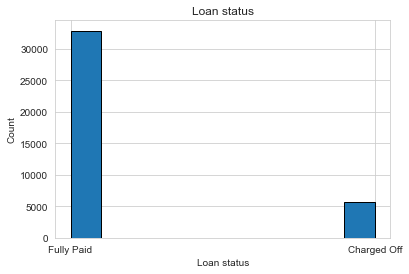

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df.loan_status,ec='black')
plt.xlabel('Loan status')
plt.ylabel("Count")
plt.title("Loan status")
plt.show()

<h4>Around 5000 people who are defaulters in the loan status from the above graph</h4>

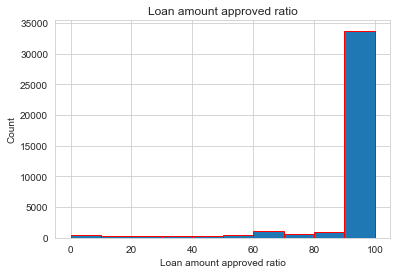

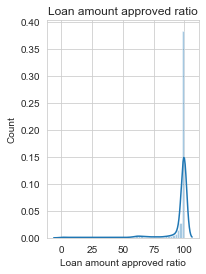

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df.loan_amnt_approved_ratio,bins=10,ec='red')
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.distplot(x=df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan amount approved ratio")
plt.show()

<h4>Maximun loan amount approved ratio is in between 90% - 100% from the above graph<h4>

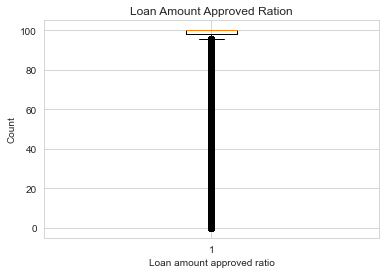

In [22]:
plt.figure(figsize=(6,4))
plt.boxplot(df.loan_amnt_approved_ratio)
plt.xlabel('Loan amount approved ratio')
plt.ylabel("Count")
plt.title("Loan Amount Approved Ration")
plt.show()

<h4>Minimum value of Loan amount approved ratio lies in between 90%-100% from the above graph</h4>

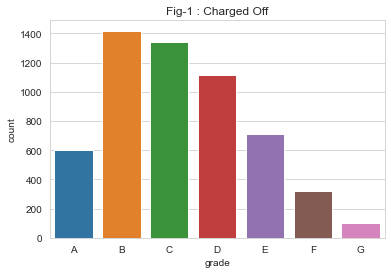

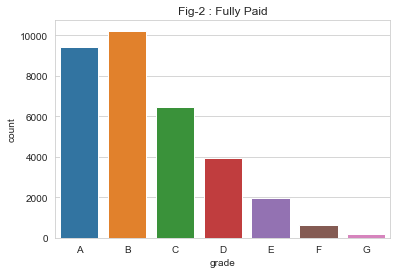

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

<h4>
    Maximum number of charged off loans is happend in the grade B category from Fig-1  </br>
    Maximum number of charged off loans is happend in the grade B category from Fig-2
</h4>

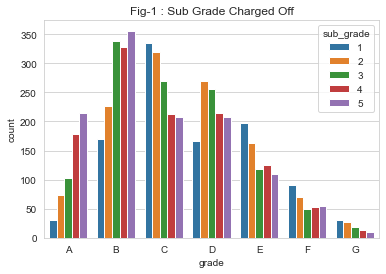

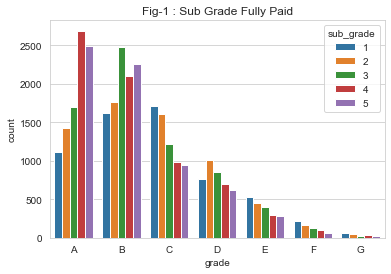

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Sub Grade Charged Off")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-1 : Sub Grade Fully Paid")
plt.show()

<h4>
    Maximum number of charged off loans is happend in the grade B category from Fig-1  </br>
    Maximum number of charged off loans is happend in the grade B category from Fig-2
</h4>

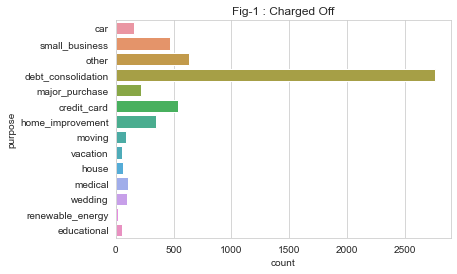

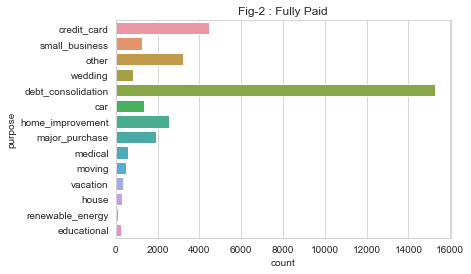

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(y='purpose',data=df[df.loan_status=='Charged Off'])
plt.title("Fig-1 : Charged Off")
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(y='purpose',data=df[df.loan_status=='Fully Paid'])
plt.title("Fig-2 : Fully Paid")
plt.show()

<h4>
    debt_consolidation is having more Charged Off and Fully Paid
</h4>

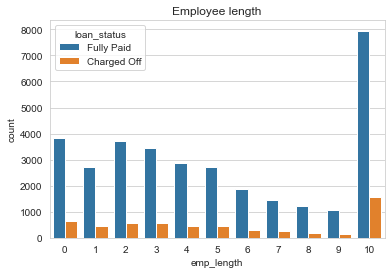

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='emp_length',hue='loan_status',data=df)
plt.title("Employee length")
plt.show()

<h4>As per the above graph if emp lenght is more than 10 years charged off is more</h4>


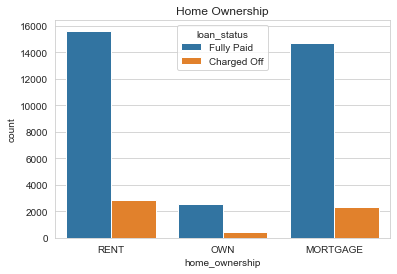

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='home_ownership',hue='loan_status',data=df)
plt.title("Home Ownership")
plt.show()

<h4>Home Ownership having RENT loan status is fully paid is in between 14000 and 16000</h4>

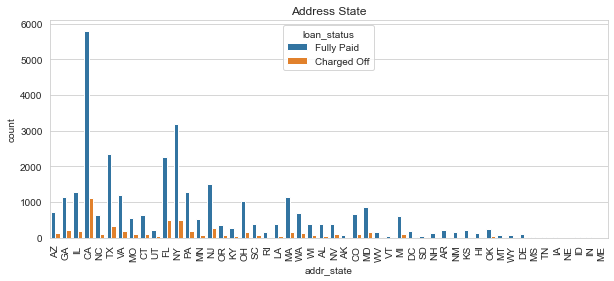

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='addr_state',hue='loan_status',data=df)
plt.xticks(rotation=90)
plt.title("Address State")
plt.show()

<h4>People take loan in CA Address State is Fully paid</h4>

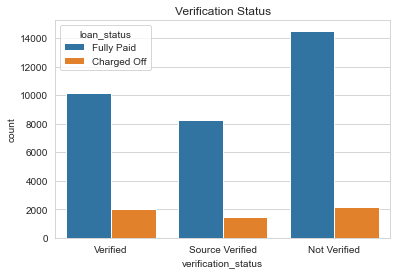

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='verification_status',hue='loan_status',data=df)
plt.title("Verification Status")
plt.show()

<h4>As per the above graph if Verification Status is Verified then loan status is Fully paid</h4>

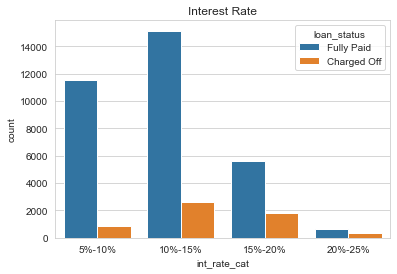

In [30]:
plt.figure(figsize=(6,4))
df['int_rate_cat']=pd.cut(df.int_rate,bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
sns.countplot(x='int_rate_cat',hue='loan_status',data=df)
plt.title("Interest Rate")
plt.show()

<h4>Fully paid loan amount is happend ifInterest Rate is between 10%-15% </h4>

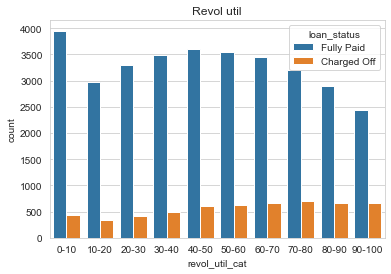

In [31]:
plt.figure(figsize=(6,4))
df['revol_util_cat']=pd.cut(df.revol_util,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='revol_util_cat',hue='loan_status',data=df)
plt.title("Revol util")
plt.show()

<h4>Revol util is in between 70-80 we are having more charge off loan status from the above graph</h4>

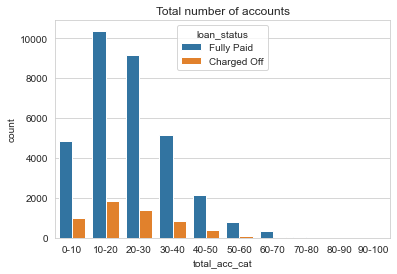

In [32]:
plt.figure(figsize=(6,4))
df['total_acc_cat']=pd.cut(df.total_acc,bins=10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
sns.countplot(x='total_acc_cat',hue='loan_status',data=df)
plt.title("Total number of accounts")
plt.show()

<h4>If total number of accounts is in between 10-20 loan status is more in Fully paid and charged off from the above graph</h4>

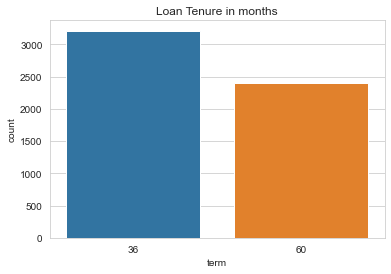

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='term',data=df[df.loan_status=='Charged Off'])
plt.title("Loan Tenure in months")
plt.show()

<h4>Charged Off is more if the term plan is 36 months from the above graph</h4>

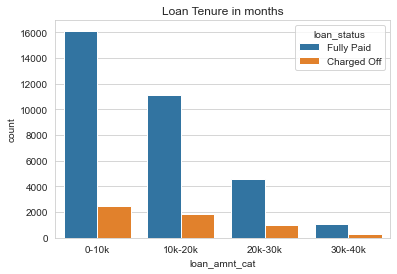

In [34]:
df['loan_amnt_cat']=pd.cut(df.loan_amnt,bins=4,labels=['0-10k','10k-20k','20k-30k','30k-40k'])
plt.figure(figsize=(6,4))
sns.countplot(x='loan_amnt_cat', hue='loan_status',data=df)
plt.title("Loan Tenure in months")
plt.show()

<h4>More charged off and fully paid is happened in 0 to 10000 range</h4>

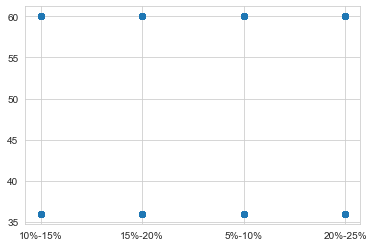

In [35]:
# intrest rate vs tenure length
plt.figure(figsize=(6,4))
df['int_rate_cat']=pd.cut(df.int_rate,bins=4,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
plt.scatter(df.int_rate_cat,df.term)
plt.show()

<h4>As per the above graph interest rate is not dependent on term plan</h4>

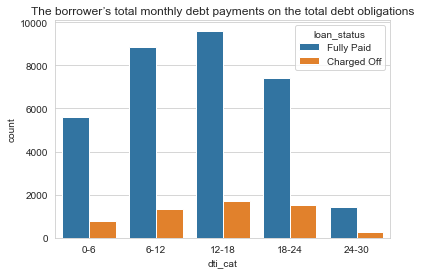

In [36]:
plt.figure(figsize=(6,4))
df['dti_cat']=pd.cut(df.dti,bins=5,labels=['0-6','6-12','12-18','18-24', '24-30'])
sns.countplot(x='dti_cat',hue='loan_status', data=df)
plt.title("The borrower’s total monthly debt payments on the total debt obligations")
plt.show()

<h4>Dti between 12-18 having more charged off when compared with other ranges</h4>

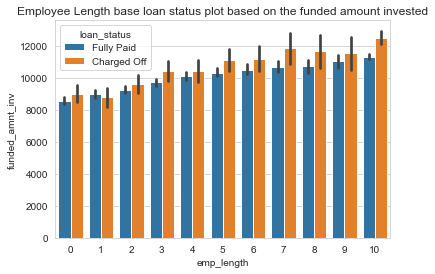

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="emp_length", y="funded_amnt_inv", hue="loan_status")
plt.title("Employee Length base loan status plot based on the funded amount invested")
plt.show()

<h4>Emp having 10 yrs having more charged off for funded loan amount investment 12000+</h4>

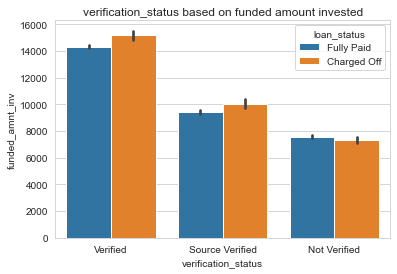

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="verification_status", y="funded_amnt_inv", hue="loan_status")
plt.title("verification_status based on funded amount invested")
plt.show()

<h4>More charged off is in verified status in between 14000 to 16000 funded amount investment</h4>

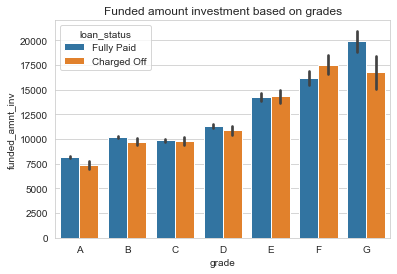

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="grade", y="funded_amnt_inv", hue="loan_status", order=['A','B','C','D','E','F','G'])
plt.title("Funded amount investment based on grades")
plt.show()

<h4>17500 funded amount investment have more charged off in F grade</h4>

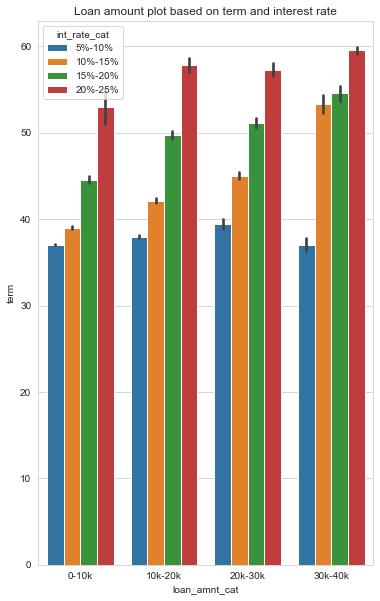

In [40]:
plt.figure(figsize=(6,10))
sns.barplot(data=df, x="loan_amnt_cat", y="term", hue="int_rate_cat")
plt.title("Loan amount plot based on term and interest rate")
plt.show()

<h4>If loan amount range between 30k to 40k then interest is also high</h4>

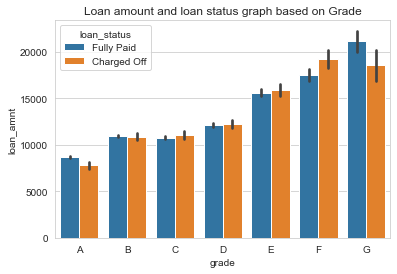

In [41]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="grade", y="loan_amnt", hue="loan_status", order=['A','B','C','D','E','F','G'])
plt.title("Loan amount and loan status graph based on Grade")
plt.show()

<h4>18k - 20k loan amount have more charged off in F grade</h4>

In [42]:
annual_inc_quantile= df.annual_inc.quantile([0.5,0.25,0.50 ,0.75,0.90, 0.95, 0.97,0.98, 0.99])
drop_annual_inc_percentage_gt_97 = df.annual_inc.quantile(0.97)
df=df[df.annual_inc <= drop_annual_inc_percentage_gt_97]
df['annual_inc_cat'] = pd.cut(df.annual_inc, bins=5,labels =['0k-30k','30k-60k','60k-90k','90k-120k','>120k'])

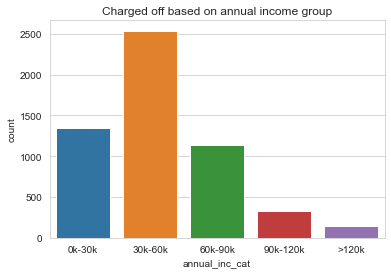

In [43]:
sns.countplot(x='annual_inc_cat', data=df[df.loan_status=='Charged Off'])
plt.title("Charged off based on annual income group")
plt.show()

More Charged off in 30k to 60k range

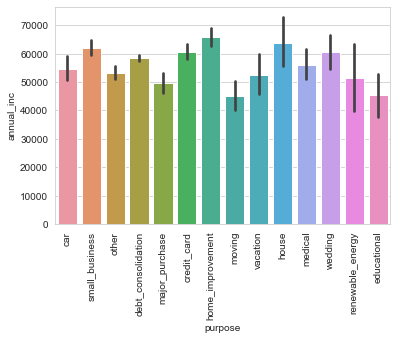

In [44]:
sns.barplot(x='purpose', y='annual_inc', data=df[df.loan_status=='Charged Off'])
plt.xticks(rotation=90)
plt.show()

Annual income with 50k to 60k with purpose home improvement have more charged off

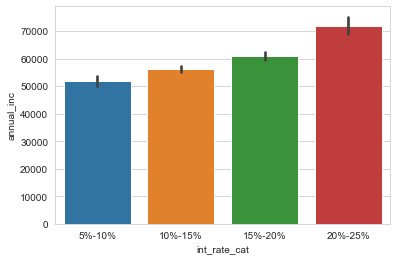

In [45]:
sns.barplot(x='int_rate_cat', y='annual_inc', data=df[df.loan_status=='Charged Off'])
plt.show()

Interest rate 20 to 25 percentage  with annual income 60000+ have more charged off

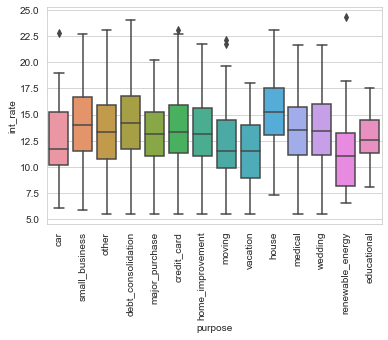

In [46]:
sns.boxplot(x='purpose', y='int_rate', data=df[df.loan_status=='Charged Off'])
plt.xticks(rotation=90)
plt.show()

Loan taken for house purpose has more charged off

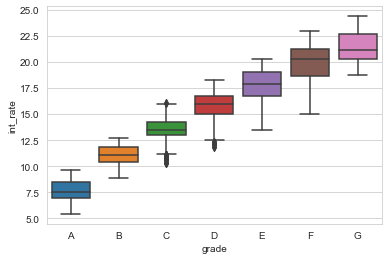

In [47]:
sns.boxplot(x='grade', y='int_rate', data=df[df.loan_status=='Charged Off'], order=['A','B','C','D','E','F','G'])
plt.show()

interest high with grade G has more defaulters

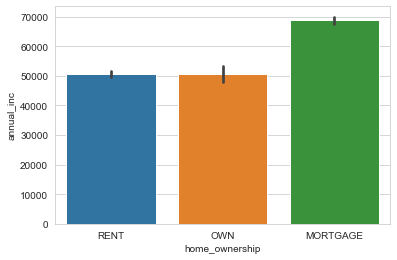

In [48]:
sns.barplot(x='home_ownership', y='annual_inc', data=df[df.loan_status=='Charged Off'])
plt.show()

Mortgage home ownership with 60000 annual income have more charged off

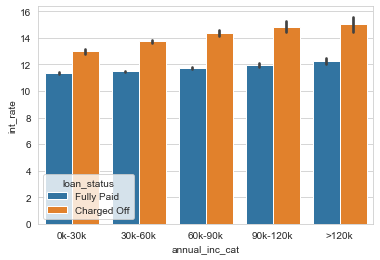

In [49]:
sns.barplot(x='annual_inc_cat', y='int_rate', hue= 'loan_status', data=df)
plt.show()

Annual income with 90k-120k having high interest rate have more charged off

In [50]:
df['issue_year']=pd.DatetimeIndex(df.issue_d).year

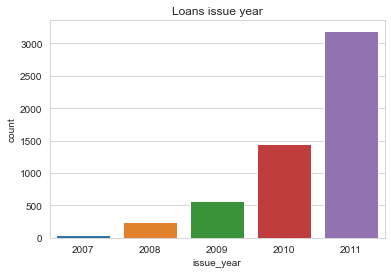

In [51]:
sns.countplot(x='issue_year', data=df[df.loan_status=="Charged Off"])
plt.title('Loans issue year')
plt.show()

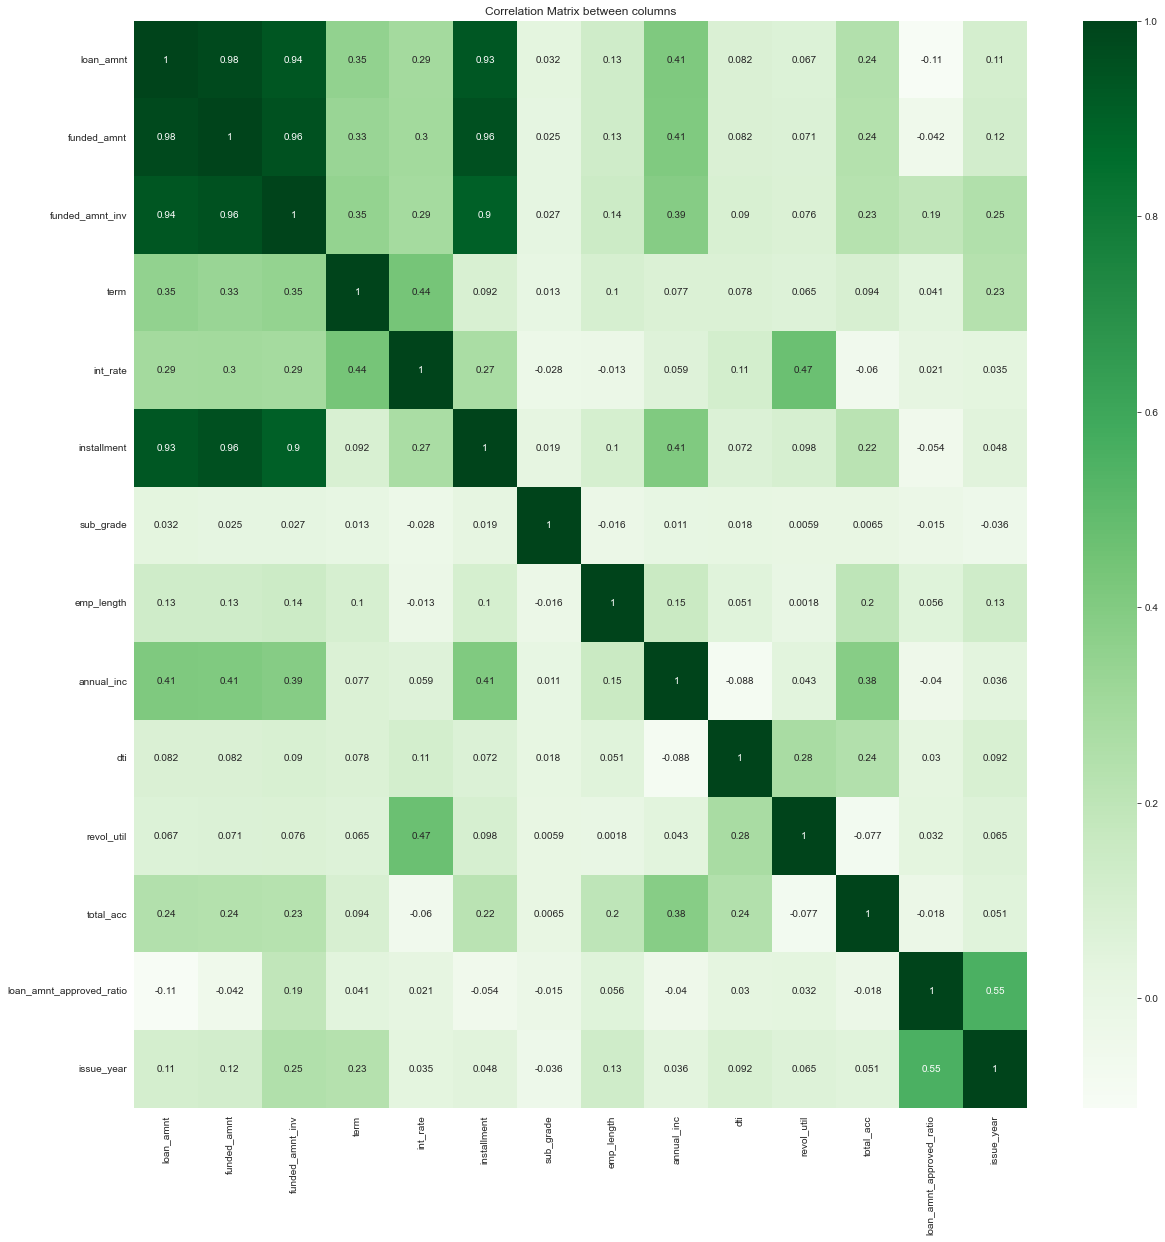

In [52]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot = True, cmap='Greens')
plt.yticks(rotation=0)
plt.title("Correlation Matrix between columns")
plt.show()

positive correlation at revol_util and int_rate
positive correlation at loan amount approved ratio and year issued